## Take Home Challenge
## Part 1 : Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.


## 1. Load and Explore the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lets checkout the data

logins = pd.read_json('logins.json')
logins.head()

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21

In [3]:
#Lets change it to an actual date time

logins['login_time'] = pd.to_datetime(logins['login_time'])

In [4]:
logins.shape

(93142, 1)

In [5]:
## Lets see what type of data we have

logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


The data looks good! There are no missing values from the data set of 93,142.

In [6]:
## Aggragate by 15 mins intervals

logins.set_index('login_time', inplace=True)
logins['count'] = 1
logins = logins.resample('15T').sum()


In [7]:
logins= pd.DataFrame(logins)

In [8]:
logins.reset_index(inplace=True)

In [9]:
logins.head()

login_time  count
0 1970-01-01 20:00:00      2
1 1970-01-01 20:15:00      6
2 1970-01-01 20:30:00      9
3 1970-01-01 20:45:00      7
4 1970-01-01 21:00:00      1

In [10]:
logins.describe()

count
count  9788.000000
mean      9.515938
std       8.328818
min       0.000000
25%       3.000000
50%       7.000000
75%      13.000000
max      73.000000

In [11]:
print('First login is: {}'.format(logins.index.min()))
print('Last login is: {}'.format(logins.index.max()))

First login is: 0
Last login is: 9787


The data is from January 1st, 1970 to April 13th, 1970. Four months of data.

## 2. Key statistics 

In [12]:
logins['count'].min()

0

In [13]:
logins[logins['count'] == 0]

login_time  count
6    1970-01-01 21:30:00      0
33   1970-01-02 04:15:00      0
41   1970-01-02 06:15:00      0
88   1970-01-02 18:00:00      0
147  1970-01-03 08:45:00      0
...                  ...    ...
9555 1970-04-11 08:45:00      0
9734 1970-04-13 05:30:00      0
9736 1970-04-13 06:00:00      0
9738 1970-04-13 06:30:00      0
9740 1970-04-13 07:00:00      0

[407 rows x 2 columns]

There where many times when there was no usage.

In [14]:
logins['count'].max()

73

In [15]:
logins[logins['count'] == 73]

login_time  count
5602 1970-03-01 04:30:00     73

In [16]:
#Lets see what day of the week we had the most logins on

d = pd.Timestamp('1970-03-01')
print(d.dayofweek, d.day_name())

6 Sunday


The most usage took place on a Sunday. More people are out and about on the weekends.

In [17]:
logins['count'].mean()

9.51593788312219

The average usage is 9.51.

In [18]:
logins['count'].std()

8.328818383338547

The standard deviation is relatively high. This means there is a lot of fluctions from each timestamp.

## 3. Visualizing the Data

###  3.1 The entire Dataset

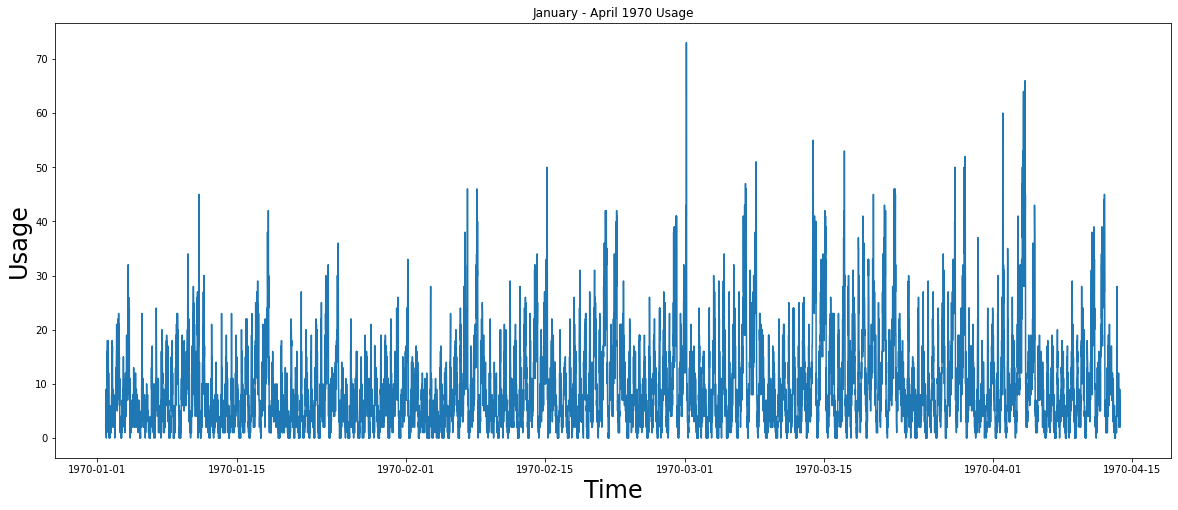

In [19]:
# Here is the entire dataset

x=logins['login_time']
y=logins['count']

plt.figure(figsize = (20,8))
plt.title('January - April 1970 Usage')
plt.plot(x,y)
plt.ylabel('Usage', fontsize=24)
plt.xlabel('Time', fontsize=24)
plt.show()

It looks as if there is high usage on the weekends or later in the week. At the start of the week there is not as much action.

### 3.2 The break down of each hour

In [20]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  9788 non-null   datetime64[ns]
 1   count       9788 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 153.1 KB


In [21]:
# Which hours have the most logins

logins['hour'] = logins['login_time'].dt.hour
diff_hour = logins[['count', 'hour']]
diff_hour = logins.groupby('hour').sum().reset_index()
diff_hour.sort_values(by='count', ascending=False)

hour  count
22    22   6607
1      1   6317
23    23   6058
0      0   5993
2      2   5800
11    11   5799
21    21   5623
4      4   5034
12    12   4964
3      3   4831
20    20   4103
13    13   3611
14    14   3426
19    19   3235
10    10   3064
15    15   3038
18    18   2980
5      5   2945
16    16   2832
17    17   2584
9      9   1527
6      6   1138
8      8    818
7      7    815

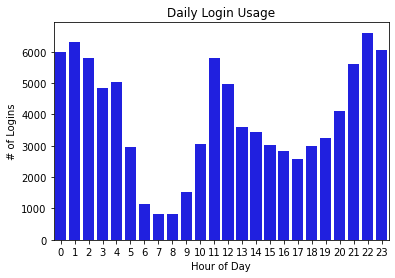

In [22]:
sns.barplot(x= 'hour', y='count', data=diff_hour, color='blue')
plt.xlabel('Hour of Day')
plt.title('Daily Login Usage')
plt.ylabel('# of Logins')
plt.show()

This graph shows us that usage is highest in 22nd hour/10pm. The logins are high in the early morning from the 0-4 hour/12-4am. Then declines in the morning from 5-8am. It increase gradually from 9-11am then declines from 11am-5pm. It starts to rise from 5pm to 10pm. Peak hours are late at night and very early in the morning as well as midday.

### 3.3 Days of the Week

In [23]:
# Lets see which days are the busiest

logins['Day of Week'] = logins['login_time'].dt.dayofweek
day_count = logins.groupby('Day of Week').sum().reset_index()

day_count['Day of Week'] = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday', 'Sunday']
day = day_count[['Day of Week','count']]
day.sort_values(by='count', ascending=False)


Day of Week  count
5    Saturday  19377
6      Sunday  18167
4      Friday  15208
3    Thursday  11960
2   Wednesday  10339
1     Tuesday   9268
0      Monday   8823

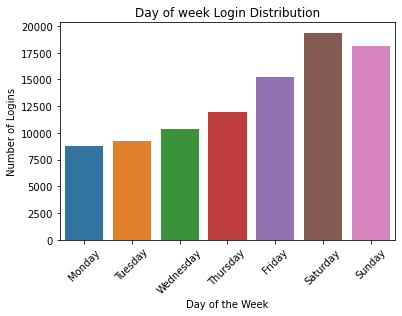

In [24]:
sns.barplot(x= 'Day of Week', y='count', data=day_count)
plt.xlabel('Day of the Week')
plt.xticks(rotation = 45)
plt.title('Day of week Login Distribution')
plt.ylabel('Number of Logins')
plt.show()

Here we can see that logins increase as the week goes on. There is a small drop off on Sundays.

## Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

**1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?**

The key measurement of success would be to see if it is beneficial to customers and drivers to serve both cities. I would measure three variables to see if the experiment is worth it:

* If it reduces wait times for customer
* Increases profit for the drivers
* Is it worth it for the city to reimburse the drivers for the toll
        
These three variables are the most valuable aspects of the experiment. The most important element to customers is convenience of obtaining a ride and the city wants happy customers and less congestion on their roads. The drivers are potentially interested in making more money by spending time in a different city. The city wants to know if it is worth it to pay the tolls by sending drivers across the bridge.

**2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:**

We would implement this by conducting an A/B test.

**a) how you will implement the experiment:**

We would collect data from drivers, tolls, and customers from before and after the experiment and compare them. We would compare average wait times before and after the change. Also to compare profits as well before and after the experiment. Lastly, we could look at the data on the tolls each city paid for the drivers and compare it to reduced traffic during peak hours and customer ratings before and after.

**b) what statistical test(s) you will conduct to verify the significance of the observation:**

We would do a null hypothesis test on the three variables to verify the significance of the observation. Our null hypothesis would be that nothing has changed by paying for the drivers tolls by serving both cities. This would indicate that each individual variable all had the same mean before and after the experiment. For example the mean of profits for all drivers is the same before and after. We could do a trail of 12 months for seasonal adjustments. Here we could compare the data for every month before and after. Now we would test our null hypothesis on each variable.

* For wait times: The p-value would be that a customer waited 60 seconds less not in the experiment. This is the probability that a customer waited less before the experiment. If this happened less than 5% of the time then we can reject the null hypothesis and it is highly unlikely to happen. Then the experiment of paying for tolls and having drivers go to opposite cities is worth paying for the tolls. This is statistically significant.

* Profits: The p-value would be that the drivers made 20% more not in the experiment. This is the probability that a driver made more money before the experiment. If this happened less than 5% of the time then we can reject the null hypothesis and it is highly unlikely to happen. Then the experiment is a success and is statistically significant.

* Toll Payment: The p-value would be that the city had higher customer ratings and less traffic not in the experiment. This is the probability that customers were happier and had less wait times in traffic before the experiment. If this happened less than 5% of the time then we can reject the null hypothesis and it is highly unlikely to happen. Then the experiment is a success and is statistically significant.

**c) how you would interpret the results and provide recommendations to the city operations team along with any caveats:**

If we reject each of these null hypothesis then we know that the city should continue the program. If the numbers from the data do not express an improvement they should go back to the drivers staying in their individual cities.
The caveats are the quality and length of the experiment. Issues like will the drivers actually go to the opposite cities and increased traffic at certain times are a few of the issues that might come from the experiment. The city would need to work out these different issues by implementing the project as they arise.


## Part 3 ‐ Predictive modeling


Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import sklearn

In [26]:
df = pd.read_json('ultimate_data_challenge.json')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [28]:
df.shape

(50000, 12)

In [29]:
df.describe()

trips_in_first_30_days  avg_rating_of_driver     avg_surge  \
count            50000.000000          41878.000000  50000.000000   
mean                 2.278200              4.601559      1.074764   
std                  3.792684              0.617338      0.222336   
min                  0.000000              1.000000      1.000000   
25%                  0.000000              4.300000      1.000000   
50%                  1.000000              4.900000      1.000000   
75%                  3.000000              5.000000      1.050000   
max                125.000000              5.000000      8.000000   

          surge_pct   weekday_pct      avg_dist  avg_rating_by_driver  
count  50000.000000  50000.000000  50000.000000          49799.000000  
mean       8.849536     60.926084      5.796827              4.778158  
std       19.958811     37.081503      5.707357              0.446652  
min        0.000000      0.000000      0.000000              1.000000  
25%        0.000000     33.300000      2.420000              4.700000  
50%        0.000000     66.700000      3.880000              5.000000  
75%        8.600000    100.000000      6.940000              5.000000  
max      100.000000    100.000000    160.960000              5.000000

In [30]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   5.0  
1         50.0      8.26                   5.0  
2        100.0      0.77                   5.0  
3         80.0      2.36                   4.9  
4         82.4      3.13                   4.9

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).